In [5]:
import pandas as pd
import numpy as np
import math
import json
from matplotlib import pyplot as plt
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


% matplotlib inline
plt.rcParams["figure.figsize"] = (12, 9) 

pd.options.display.float_format = "{:.2f}".format


# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [2]:
# Deleting NaN values
profile = profile.dropna()

In [3]:
clean_transcript = transcript.copy()
clean_transcript["offer_id"] = clean_transcript['value'].apply(lambda x: x['offer id'] if ('offer id' in x) else x['offer_id'] if ('offer_id' in x) else -1)

In [4]:

# Get for how long a user has been a client
maxtime = profile['became_member_on'].max() + 1

date_time_obj = datetime.datetime.strptime(str(maxtime), '%Y%m%d').date()
profile['user_day'] = date_time_obj - pd.to_datetime(profile['became_member_on'], format='%Y%m%d').dt.date
profile['user_day'] = profile['user_day'].dt.days



In [5]:
# Getting offers id
offers_id = portfolio.id.unique()

In [6]:
# Instead calculate all the matrix (2h) a pickle is readed
import pandas as pd
user_ofer_matrix = pd.read_pickle("./user_ofer_matrix.pkl")


In [7]:
user_ofer_matrix.head()

,user_id,offer_id,recived,viewed,complete,real_complete
0,0610b486422d4921ae7d2bf64640c50b,3f207df678b143eea3cee63160fa8bed,1,0,0,0
0,0610b486422d4921ae7d2bf64640c50b,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,1,0
0,78afa995795e4d85b5d9ceeca43f5fef,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,1
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,1
0,78afa995795e4d85b5d9ceeca43f5fef,5a8bc65990b245e5a138643cd4eb9837,1,1,0,0


In [8]:
%%time

# How many offers are completed
r_c = user_ofer_matrix[user_ofer_matrix["real_complete"] > 0]

offers_sum = []
for i in offers_id:
    offers_sum.append(r_c[r_c["offer_id"] == i]["real_complete"].sum())
    

CPU times: user 43.3 ms, sys: 3.87 ms, total: 47.2 ms
Wall time: 48.2 ms


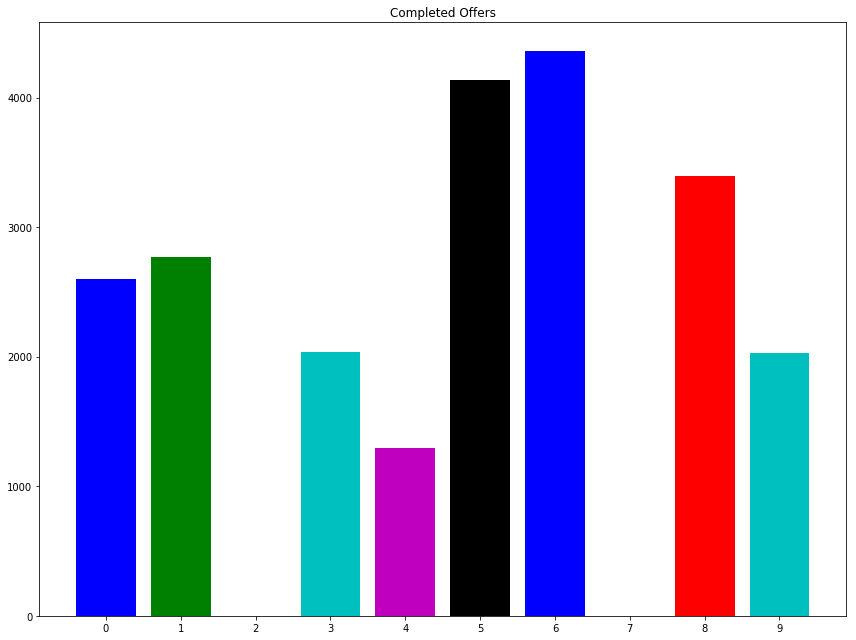

In [25]:
from itertools import cycle
cycol = cycle('bgrcmk')

y_pos = np.arange(len(offers_id))
fig = plt.bar(y_pos, offers_sum, color=[next(cycol) for i in y_pos])
plt.xticks(y_pos, y_pos)
plt.title('Completed Offers')
plt.legend()
plt.tight_layout()
plt.savefig('img/Completed_Offers.png')

plt.show()


# Offers

As we can see the offer 5th and 6th are the most completed ones (**3 and 2 discounts**) follow by the 8th (**BOGO of 5**)

The others have more or less the half of the top ones

In [10]:
portfolio

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [11]:
%%time

# Distribution of completed offers by income
incomes = []
for i in offers_id:
    income = []
    for us in r_c[r_c["offer_id"] == i]["user_id"].values:
        income.append(profile[profile["id"] == us]["income"].values[0])
    incomes.append(income)

CPU times: user 40.8 s, sys: 993 µs, total: 40.8 s
Wall time: 41.1 s


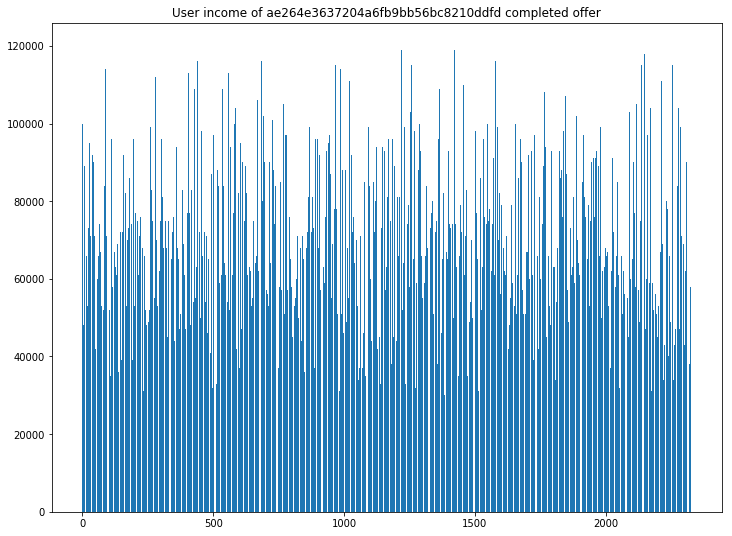

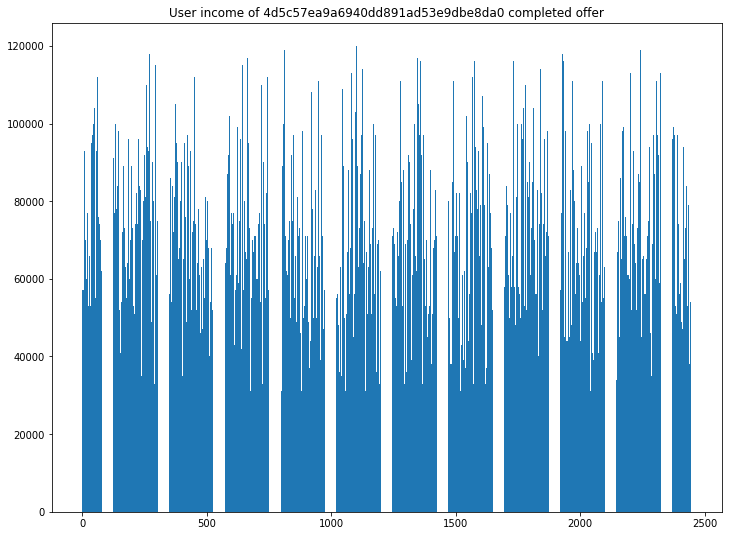

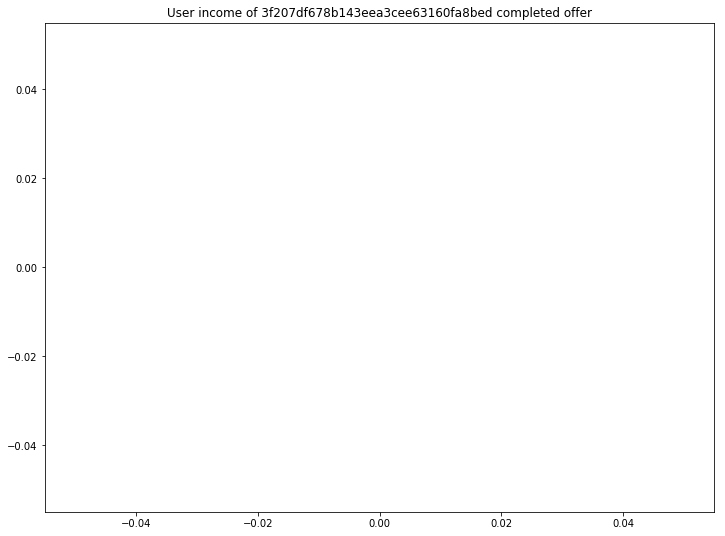

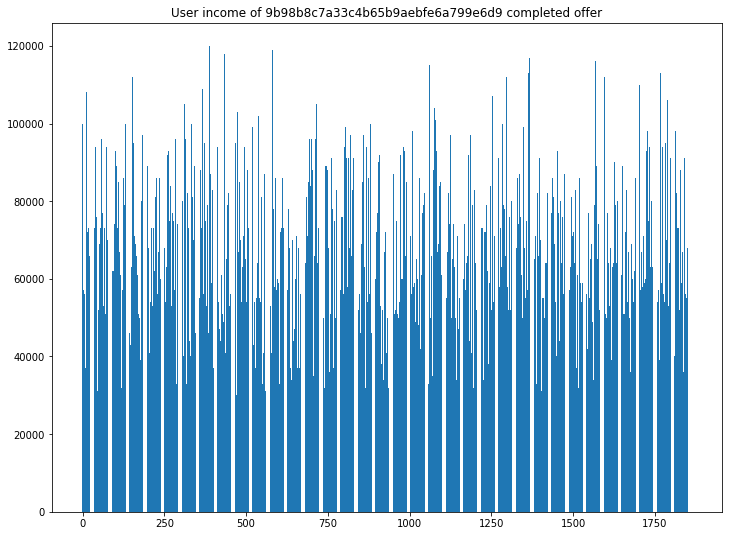

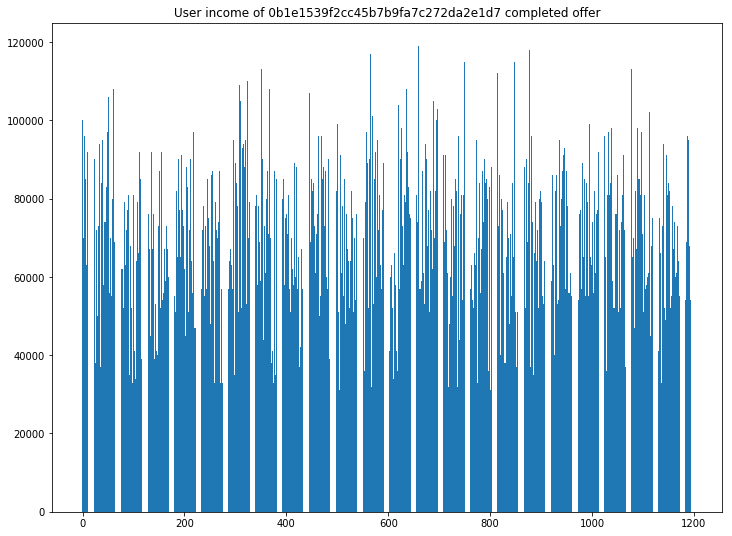

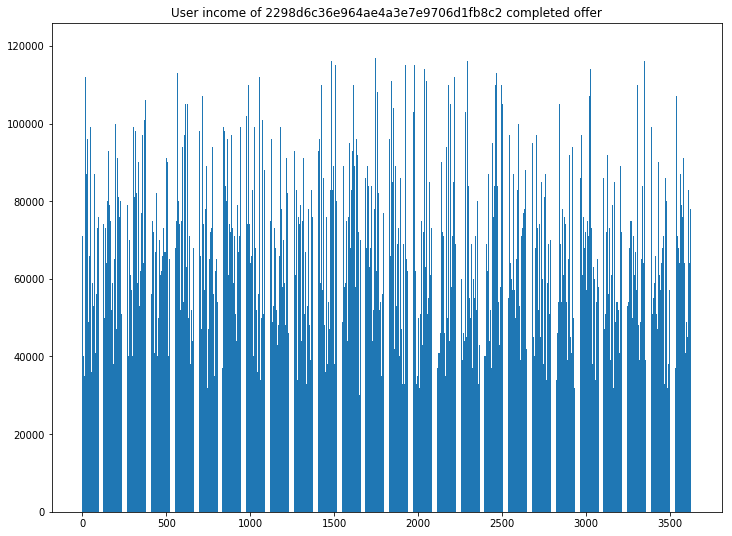

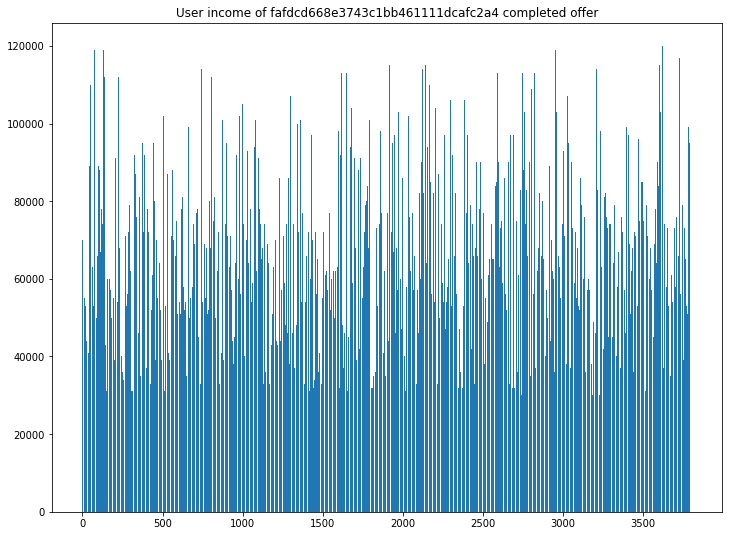

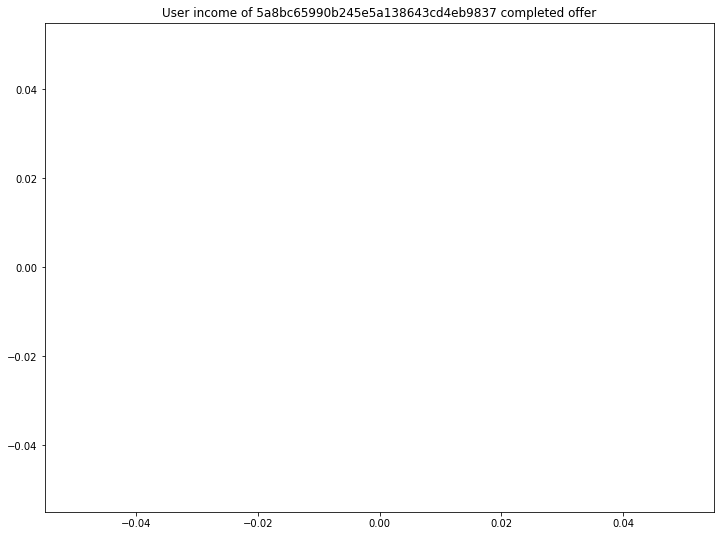

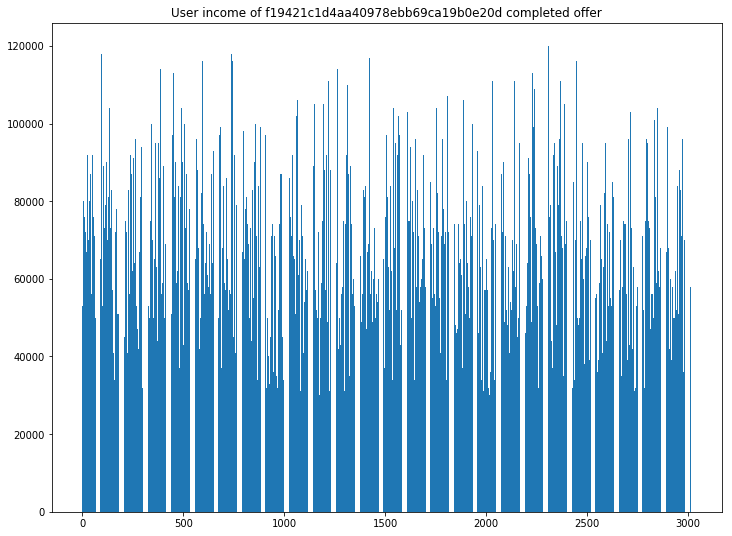

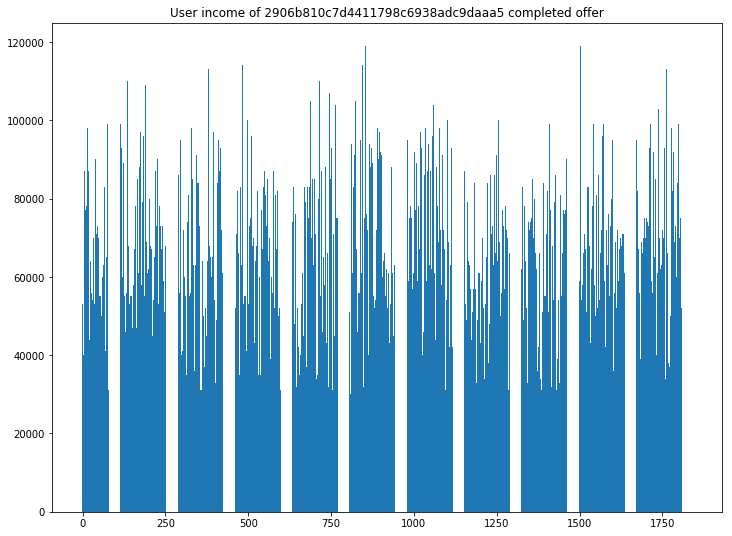

In [26]:

for inc, off in zip(incomes, offers_id):
    title = "User income of {} completed offer".format(off)
    plt.title(title)
    plt.bar( np.arange(len(inc)),inc)
    plt.savefig('img/income_{}.png'.format(off))

    plt.show()


# Offers

There isnt any remarcable data about the income on the completed offers

In [27]:
%%time

# Distribution of completed offers by gender

men_means = []
women_means = []
other_means = []

for i in offers_id:
    gender = []
    for us in r_c[r_c["offer_id"] == i]["user_id"].values:
        gender.append(profile[profile["id"] == us]["gender"].values[0])
    man = len([s for s in gender if "M" in s])
    woman = len([s for s in gender if "F" in s])
    oth = len([s for s in gender if "O" in s])

    men_means.append(man)
    women_means.append(woman)
    other_means.append(oth)


CPU times: user 46 s, sys: 19.8 ms, total: 46 s
Wall time: 46.3 s


In [28]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

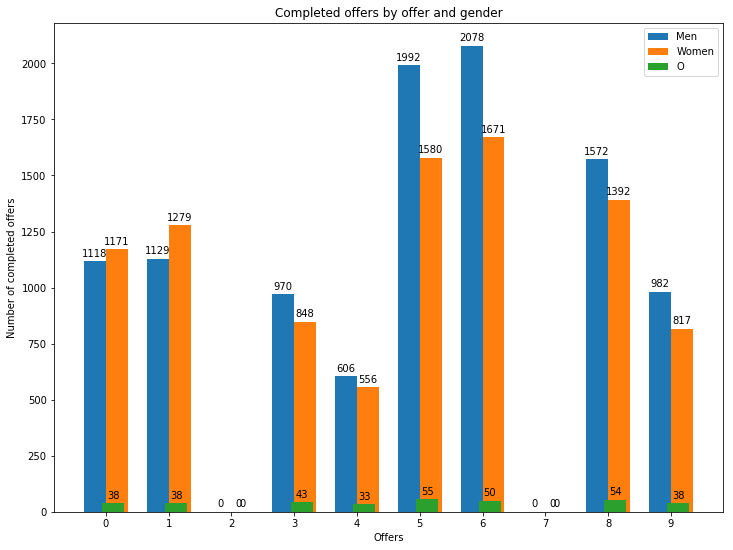

In [29]:

labels = y_pos.tolist()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')
rects3 = ax.bar(x + width/3, other_means, width, label='O')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of completed offers')
ax.set_xlabel('Offers')

ax.set_title('Completed offers by offer and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.savefig('img/offer_gender.png')

plt.show()

# Offers

There are more Mens who complete the top offers but on the other completed offers the differences aren't remarcable

The _Others_ gnere are underrepresentated 

In [1]:
## Enter your css for the table.
css = """
<style type=\"text/css\">
table {
color: #333;
font-family: Helvetica, Arial, sans-serif;
width: 640px;
border-collapse:
collapse; 
border-spacing: 0;
}

td, th {
border: 1px solid transparent; /* No more visible border */
height: 30px;
}

th {
background: #DFDFDF; /* Darken header a bit */
font-weight: bold;
}

td {
background: #FAFAFA;
text-align: center;
}

table tr:nth-child(odd) td{
background-color: white;
}
</style>
"""

In [2]:
def DataFrame_to_image(data, css, outpuname="out", format="png"):
    '''
    For rendering a Pandas DataFrame as an image.
    data: a pandas DataFrame
    css: a string containing rules for styling the output table. This must 
         contain both the opening an closing <style> tags.
    *outputimage: filename for saving of generated image
    *format: output format, as supported by IMGKit. Default is "png"
    '''
    fn = outpuname + ".html"
    
    try:
        os.remove(fn)
    except:
        None
    text_file = open(fn, "a")
    
    # write the CSS
    text_file.write(css)
    # write the HTML-ized Pandas DataFrame
    text_file.write(data.to_html())
    text_file.close()

# Data Preparation

For the labels 4 encodeds are going to be made:

- 1) A one hot encoded user with the completed offers
    - 1.1)  the one hot encoded has also the number of completed offers
- 2) The label with the maximum reward
- 3) an array of the completed offers


As the previous datasets were not giving good results, the problem and the input were re-engineered. In this case, merging the offers data in the independent variables along with the demographic features is chosen so a binary classifier is made, this classifier specifies either the offer will be successful (viewed and completed) or not successful (ignored).

- 4) Demographic features + hot-encoded completed offers

## 1)

In [109]:
y_data_columns = ["user_id"] + list(portfolio.id.unique())
y_dataset = pd.DataFrame(columns =y_data_columns)

In [110]:
%%time

for index, row in profile.iterrows():
    zeros = [row["id"]] + [0]*(len(y_data_columns)-1)
    df = pd.DataFrame([zeros], columns=y_data_columns)
    for i, row in user_ofer_matrix[(user_ofer_matrix["user_id"] == row["id"]) & (user_ofer_matrix["real_complete"] > 0)].iterrows():
        df[row["offer_id"]] = row["real_complete"]
    y_dataset = y_dataset.append(pd.DataFrame(df, columns=y_data_columns))

CPU times: user 3min 45s, sys: 400 ms, total: 3min 46s
Wall time: 3min 47s


In [111]:
y_dataset = y_dataset.reset_index()

In [112]:
del y_dataset['index']

In [113]:
y_dataset.shape

(14825, 11)

In [114]:
y_dataset.head()

,user_id,ae264e3637204a6fb9bb56bc8210ddfd,4d5c57ea9a6940dd891ad53e9dbe8da0,3f207df678b143eea3cee63160fa8bed,9b98b8c7a33c4b65b9aebfe6a799e6d9,0b1e1539f2cc45b7b9fa7c272da2e1d7,2298d6c36e964ae4a3e7e9706d1fb8c2,fafdcd668e3743c1bb461111dcafc2a4,5a8bc65990b245e5a138643cd4eb9837,f19421c1d4aa40978ebb69ca19b0e20d,2906b810c7d4411798c6938adc9daaa5
0,0610b486422d4921ae7d2bf64640c50b,0,0,0,0,0,0,0,0,0,0
1,78afa995795e4d85b5d9ceeca43f5fef,1,0,0,1,0,0,0,0,0,0
2,e2127556f4f64592b11af22de27a7932,0,0,0,1,0,0,1,0,0,0
3,389bc3fa690240e798340f5a15918d5c,0,0,0,1,0,0,1,0,2,1
4,2eeac8d8feae4a8cad5a6af0499a211d,0,0,0,0,0,0,1,0,0,0


In [115]:
y_dataset.to_pickle("./y_dataset.pkl")

In [36]:
y_dataset = pd.read_pickle("./y_dataset.pkl")

DataFrame_to_image(y_dataset.head(), css, outpuname="y_dataset" )


## 1.1)

In [116]:
y_data_columns1 = ["user_id"] + list(portfolio.id.unique())
y_dataset1 = pd.DataFrame(columns =y_data_columns)

In [117]:
%%time

for index, row in profile.iterrows():
    zeros = [row["id"]] + [0]*(len(y_data_columns1)-1)
    df = pd.DataFrame([zeros], columns=y_data_columns1)
    for i in user_ofer_matrix[(user_ofer_matrix["user_id"] == row["id"]) & (user_ofer_matrix["real_complete"] == 1)]["offer_id"].values:
        df[i] = 1
    y_dataset1 = y_dataset1.append(pd.DataFrame(df, columns=y_data_columns1))

CPU times: user 3min 52s, sys: 480 ms, total: 3min 52s
Wall time: 3min 54s


In [118]:
y_dataset1 = y_dataset1.reset_index()

In [119]:
y_dataset1.shape

(14825, 12)

In [120]:
y_dataset1.head()

,index,user_id,ae264e3637204a6fb9bb56bc8210ddfd,4d5c57ea9a6940dd891ad53e9dbe8da0,3f207df678b143eea3cee63160fa8bed,9b98b8c7a33c4b65b9aebfe6a799e6d9,0b1e1539f2cc45b7b9fa7c272da2e1d7,2298d6c36e964ae4a3e7e9706d1fb8c2,fafdcd668e3743c1bb461111dcafc2a4,5a8bc65990b245e5a138643cd4eb9837,f19421c1d4aa40978ebb69ca19b0e20d,2906b810c7d4411798c6938adc9daaa5
0,0,0610b486422d4921ae7d2bf64640c50b,0,0,0,0,0,0,0,0,0,0
1,0,78afa995795e4d85b5d9ceeca43f5fef,1,0,0,1,0,0,0,0,0,0
2,0,e2127556f4f64592b11af22de27a7932,0,0,0,1,0,0,1,0,0,0
3,0,389bc3fa690240e798340f5a15918d5c,0,0,0,1,0,0,1,0,0,1
4,0,2eeac8d8feae4a8cad5a6af0499a211d,0,0,0,0,0,0,1,0,0,0


In [121]:
y_dataset1.to_pickle("./y_dataset1.pkl")

In [37]:
y_dataset1 = pd.read_pickle("./y_dataset1.pkl")

DataFrame_to_image(y_dataset1.head(), css, outpuname="y_dataset1" )


## 2)

For each user you get the completed offers
for those offers you get the rewards
The label is choosed with the max of all completed rewards

For example if an offer with a reward of 5 is compoleted 2 times it will be choosed before a completed offer with a reward of 5 completed 1 time


In [103]:
y_data_columns2 = ["user_id"] + ["offer"]
y_dataset2 = pd.DataFrame(columns =y_data_columns2)

In [104]:
%%time

for index, row in profile.iterrows():
    zeros = [row["id"]] + [0]*(len(y_data_columns2)-1)
    df = pd.DataFrame([zeros], columns=y_data_columns2)
    reward_aux = 0
    n_complete_aux = float("inf")
    for i, row in user_ofer_matrix[(user_ofer_matrix["user_id"] == row["id"]) & (user_ofer_matrix["real_complete"] > 0)].iterrows():
        offer_aux = portfolio[portfolio["id"] == row["offer_id"]]
        if ((offer_aux["reward"] * row["real_complete"]).values[0] > reward_aux):
            df["offer"] = offer_aux.index
            reward_aux = offer_aux["reward"].values[0]
            n_complete_aux = row["real_complete"]
        else:
            if ((offer_aux["reward"] * row["real_complete"]).values[0] == reward_aux) and (row["real_complete"] < n_complete_aux):
                df["offer"] = offer_aux.index
                reward_aux = offer_aux["reward"].values[0]
                n_complete_aux = row["real_complete"]
    y_dataset2 = y_dataset2.append(pd.DataFrame(df, columns=y_data_columns2))

CPU times: user 3min 40s, sys: 432 ms, total: 3min 40s
Wall time: 3min 41s


In [108]:
y_dataset2.shape

(14825, 2)

In [106]:
y_dataset2.head()

,user_id,offer
0,0610b486422d4921ae7d2bf64640c50b,0
0,78afa995795e4d85b5d9ceeca43f5fef,0
0,e2127556f4f64592b11af22de27a7932,3
0,389bc3fa690240e798340f5a15918d5c,8
0,2eeac8d8feae4a8cad5a6af0499a211d,6


In [107]:
y_dataset2.to_pickle("./y_dataset2.pkl")

In [38]:
y_dataset2 = pd.read_pickle("./y_dataset2.pkl")

DataFrame_to_image(y_dataset2.head(), css, outpuname="y_dataset2" )


## 3)

In [30]:
y_data_columns3 = ["user_id"] + ["offer"]
y_dataset3 = pd.DataFrame(columns =y_data_columns3)

In [31]:
%%time

for index, row in profile.iterrows():
    zeros = [row["id"]] + [0]*(len(y_data_columns3)-1)
    df = pd.DataFrame([zeros], columns=y_data_columns3)
    off = []
    for i in user_ofer_matrix[(user_ofer_matrix["user_id"] == row["id"]) & (user_ofer_matrix["real_complete"] > 0)]["offer_id"].values:
        off.append(portfolio[portfolio["id"] == i].index[0])        
    df["offer"] = [off]
    y_dataset3 = y_dataset3.append(pd.DataFrame(df, columns=y_data_columns3))

CPU times: user 3min 22s, sys: 759 ms, total: 3min 23s
Wall time: 3min 24s


In [32]:
profile.shape

(14825, 6)

In [33]:
y_dataset3.shape

(14825, 2)

In [34]:
y_dataset3 = y_dataset3.reset_index()

In [37]:
del y_dataset3["index"]

In [38]:
y_dataset3.head()

,user_id,offer
0,0610b486422d4921ae7d2bf64640c50b,[]
1,78afa995795e4d85b5d9ceeca43f5fef,"[0, 3]"
2,e2127556f4f64592b11af22de27a7932,"[3, 6]"
3,389bc3fa690240e798340f5a15918d5c,"[3, 6, 8, 9]"
4,2eeac8d8feae4a8cad5a6af0499a211d,[6]


In [39]:
y_dataset3.to_pickle("./y_dataset3.pkl")

# Data Preparation

The data that is used for training will be:

- age
- gender
- income
- days a user has been a user


The age, income and user_day will be normalized and the gender will be one-hot-encoded

In [57]:
x_dataset = profile.copy()

In [58]:
del x_dataset['became_member_on']

In [60]:
x_dataset.head()

,age,gender,id,income,user_day
1,55,F,0610b486422d4921ae7d2bf64640c50b,112000.00,377
3,75,F,78afa995795e4d85b5d9ceeca43f5fef,100000.00,444
5,68,M,e2127556f4f64592b11af22de27a7932,70000.00,92
8,65,M,389bc3fa690240e798340f5a15918d5c,53000.00,168
12,58,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.00,258


In [61]:
x_dataset = pd.get_dummies(x_dataset, columns=['gender'])
x_dataset.head()

,age,id,income,user_day,gender_F,gender_M,gender_O
1,55,0610b486422d4921ae7d2bf64640c50b,112000.00,377,1,0,0
3,75,78afa995795e4d85b5d9ceeca43f5fef,100000.00,444,1,0,0
5,68,e2127556f4f64592b11af22de27a7932,70000.00,92,0,1,0
8,65,389bc3fa690240e798340f5a15918d5c,53000.00,168,0,1,0
12,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.00,258,0,1,0


In [68]:
df = x_dataset.copy()

In [72]:

column_names_to_normalize = ["age","income","user_day"]
x = x_dataset[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
x_dataset[column_names_to_normalize] = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df.index)


In [74]:
x_dataset.head()

,age,id,income,user_day,gender_F,gender_M,gender_O
1,0.45,0610b486422d4921ae7d2bf64640c50b,0.91,0.21,1,0,0
3,0.69,78afa995795e4d85b5d9ceeca43f5fef,0.78,0.24,1,0,0
5,0.60,e2127556f4f64592b11af22de27a7932,0.44,0.05,0,1,0
8,0.57,389bc3fa690240e798340f5a15918d5c,0.26,0.09,0,1,0
12,0.48,2eeac8d8feae4a8cad5a6af0499a211d,0.23,0.14,0,1,0


In [35]:
DataFrame_to_image(x_dataset.head(), css, outpuname="x_dataset" )


In [75]:
x_dataset.to_pickle("./x_dataset.pkl")

## 4) 

In [34]:
y_data_columns4 = ["user_id","age","gender","income","user_day"] + list(portfolio.id.unique()) + ["class"]
y_dataset4 = pd.DataFrame(columns =y_data_columns4)

In [35]:
%%time

for index, row in profile.iterrows():
    for i in list(portfolio.id.unique()):
        zeros = [row["id"],row["age"],row["gender"],row["income"],row["user_day"]] + [0]*(len(y_data_columns4)-5)
        df = pd.DataFrame([zeros], columns=y_data_columns4)
        df[i] = 1
        if i in user_ofer_matrix[(user_ofer_matrix["user_id"] == row["id"]) & (user_ofer_matrix["real_complete"] == 1)]["offer_id"].values:
            df["class"] = 1        
        y_dataset4 = y_dataset4.append(pd.DataFrame(df, columns=y_data_columns4))
    if len(y_dataset4) % 1000 == 0:
        print(".", end = '')

....................................................................................................................................................CPU times: user 2h 28min 53s, sys: 25min 28s, total: 2h 54min 21s
Wall time: 2h 55min 20s


In [36]:
y_dataset4.head()

,user_id,age,gender,income,user_day,ae264e3637204a6fb9bb56bc8210ddfd,4d5c57ea9a6940dd891ad53e9dbe8da0,3f207df678b143eea3cee63160fa8bed,9b98b8c7a33c4b65b9aebfe6a799e6d9,0b1e1539f2cc45b7b9fa7c272da2e1d7,2298d6c36e964ae4a3e7e9706d1fb8c2,fafdcd668e3743c1bb461111dcafc2a4,5a8bc65990b245e5a138643cd4eb9837,f19421c1d4aa40978ebb69ca19b0e20d,2906b810c7d4411798c6938adc9daaa5,class
0,0610b486422d4921ae7d2bf64640c50b,55,F,112000.00,377,1,0,0,0,0,0,0,0,0,0,0
0,0610b486422d4921ae7d2bf64640c50b,55,F,112000.00,377,0,1,0,0,0,0,0,0,0,0,0
0,0610b486422d4921ae7d2bf64640c50b,55,F,112000.00,377,0,0,1,0,0,0,0,0,0,0,0
0,0610b486422d4921ae7d2bf64640c50b,55,F,112000.00,377,0,0,0,1,0,0,0,0,0,0,0
0,0610b486422d4921ae7d2bf64640c50b,55,F,112000.00,377,0,0,0,0,1,0,0,0,0,0,0


In [37]:
y_dataset4 = pd.get_dummies(y_dataset4, columns=['gender'])
y_dataset4.head()

,user_id,age,income,user_day,ae264e3637204a6fb9bb56bc8210ddfd,4d5c57ea9a6940dd891ad53e9dbe8da0,3f207df678b143eea3cee63160fa8bed,9b98b8c7a33c4b65b9aebfe6a799e6d9,0b1e1539f2cc45b7b9fa7c272da2e1d7,2298d6c36e964ae4a3e7e9706d1fb8c2,fafdcd668e3743c1bb461111dcafc2a4,5a8bc65990b245e5a138643cd4eb9837,f19421c1d4aa40978ebb69ca19b0e20d,2906b810c7d4411798c6938adc9daaa5,class,gender_F,gender_M,gender_O
0,0610b486422d4921ae7d2bf64640c50b,55,112000.00,377,1,0,0,0,0,0,0,0,0,0,0,1,0,0
0,0610b486422d4921ae7d2bf64640c50b,55,112000.00,377,0,1,0,0,0,0,0,0,0,0,0,1,0,0
0,0610b486422d4921ae7d2bf64640c50b,55,112000.00,377,0,0,1,0,0,0,0,0,0,0,0,1,0,0
0,0610b486422d4921ae7d2bf64640c50b,55,112000.00,377,0,0,0,1,0,0,0,0,0,0,0,1,0,0
0,0610b486422d4921ae7d2bf64640c50b,55,112000.00,377,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [38]:
df = y_dataset4.copy()

In [39]:

column_names_to_normalize = ["age","income","user_day"]
y_4 = y_dataset4[column_names_to_normalize].values
min_max_scaler = MinMaxScaler()
y_4_scaled = min_max_scaler.fit_transform(y_4)
y_dataset4[column_names_to_normalize] = pd.DataFrame(y_4_scaled, columns=column_names_to_normalize, index = df.index)


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
y_dataset4 = pd.read_pickle("./y_dataset4.pkl")
y_dataset4.shape

(148250, 18)

In [40]:
y_dataset4.to_pickle("./y_dataset4.pkl")

In [7]:
DataFrame_to_image(y_dataset4.head(), css, outpuname="y_dataset4" )
